In [1]:
%config InlineBackend.figure_formats = ['svg']
import oscovida as ov

In [2]:
ov.display_binder_link("tutorial-overview-graphs.ipynb")

[Execute this notebook with Binder](https://mybinder.org/v2/gh/oscovida/binder/master?filepath=ipynb/tutorial-overview-graphs.ipynb)

## Overview function explained

The most important function of `oscovida` package is `overview`. It takes the following paameters:
1. `country` — a country to analyse (mandatory, `str`);
2. `region` — a region of the country (optional, `str`);
3. `subregion` — a subregion of the country (optional, `str`);
4. `savefig` — whether to save a sigure (optional, `bool`, default is `False`;
5. `weeks` — how many last weeks to show (optional, `int`, default is zero, which means "all").

The function returns a triple:
(`pyplot` graph, a `pandas` series for _cases_, a `pandas` series for _deaths_).

This function provides six graphs:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


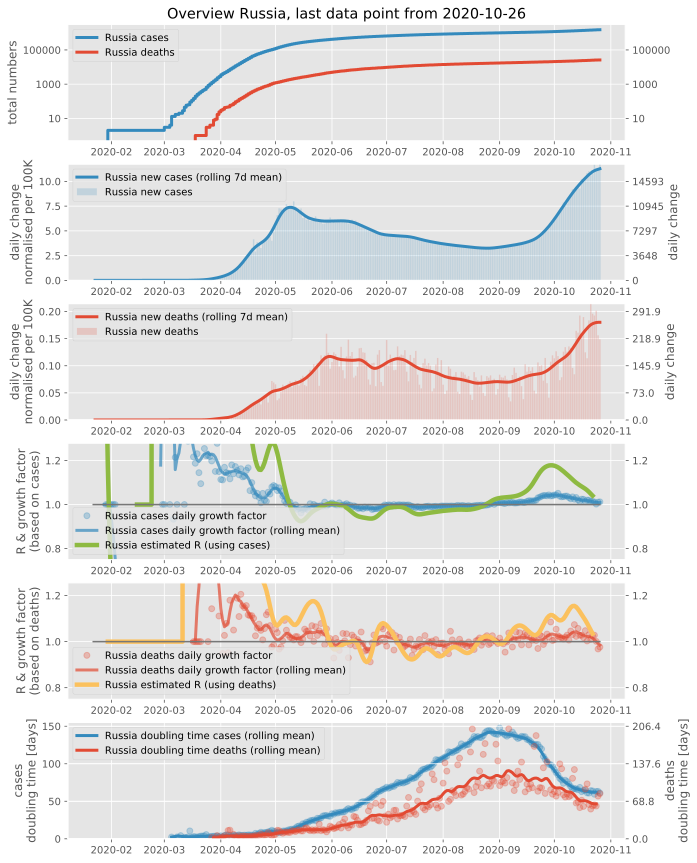

In [3]:
ov.overview('Russia');

Let's see how exactly we obtain all these graphs.

But before we start, we need to obtain the data in the way it is done in `overview()`:

In [4]:
country = "Iran"
weeks = 30
cases, deaths = ov.get_country_data(country)
cases = cases[- weeks * 7:]   # cut off unwanted data
deaths = deaths[- weeks * 7:] # cut off unwanted data

What we have in `cases` and `deaths` is Pandas time series: it is a sort of a two-row array with dates in one row and COVID cases / deaths in the other:

In [5]:
cases

2020-03-31     44605
2020-04-01     47593
2020-04-02     50468
2020-04-03     53183
2020-04-04     55743
               ...  
2020-10-22    550757
2020-10-23    556891
2020-10-24    562705
2020-10-25    568896
2020-10-26    574856
Freq: D, Name: Iran cases, Length: 210, dtype: object

We also meed to import the plotting framework:

In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FuncFormatter, FixedLocator
from matplotlib.dates import DateFormatter, MONDAY, WeekdayLocator

Also we will need an empty Matplotlib graph object to pass onto the plotting functions.

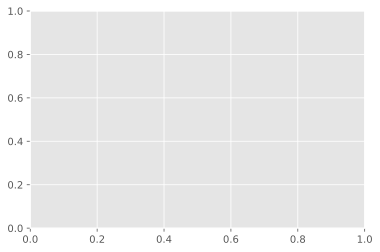

In [7]:
fig, ax1 = plt.subplots();

Now let's add some data to our empty graph
### Total numbers

In [8]:
ov.plot_time_step(ax=ax1, series=cases)   # add cases to the graph
ov.plot_time_step(ax=ax1, series=deaths)  # add deaths to the graph
ax1.set_title("Total numbers")
ax1.legend()

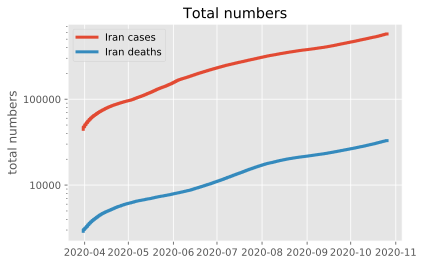

In [9]:
fig

### Daily change